In [1]:
import pandas as pd

pd.set_option('display.height', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.display import display

### Load Train/Test Data

In [2]:
train = pd.read_csv('./data/application_train.csv')

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
test = pd.read_csv('./data/application_test.csv')

In [5]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Target Variable Distribution Train Set

Base Counts for TRAIN
0    282686
1     24825
Name: TARGET, dtype: int64

FRAUD Percent TRAIN
8.782

Size of TEST Set
(48744, 121)


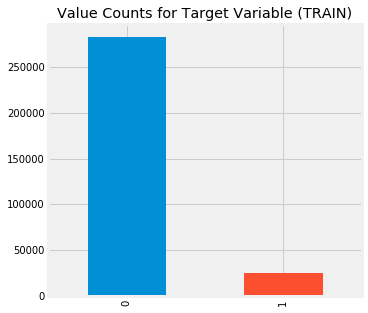

In [6]:
train_target_counts = train.TARGET.value_counts(dropna=False)

print("Base Counts for TRAIN")
print(train_target_counts)

print('\nFRAUD Percent TRAIN')
print(round((train_target_counts[1]/train_target_counts[0])*100,3))

train_target_counts.plot(kind = 'bar', figsize=(5,5), title='Value Counts for Target Variable (TRAIN)');


print('\nSize of TEST Set')
print(test.shape)

The target variable seems somewhat imbalanced. It is not a case of extreme imbalance, although I do think some of the not fraud data will need to be filtered out before any final models can be made. 

### Look Through Data Types

In [7]:
print('TRAIN')
print(train.dtypes.value_counts())

print('\nTEST')
print(test.dtypes.value_counts())

TRAIN
float64    65
int64      41
object     16
dtype: int64

TEST
float64    65
int64      40
object     16
dtype: int64


There seems to be a good number of numberical variables to work with. Minimal categoricals might help out by keeping the size of the data small.

### Look Through Categoricals

In [8]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
train_target_counts

0    282686
1     24825
Name: TARGET, dtype: int64

----------------------------------------------------------
FEATURE: NAME_CONTRACT_TYPE
NULLS: 0


SK_ID_CURR          TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                      0      1                                                             
NAME_CONTRACT_TYPE                                                                               
Cash loans             255011  23221  278232         9.106                 93.539          90.479
Revolving loans         27675   1604   29279         5.796                  6.461           9.521

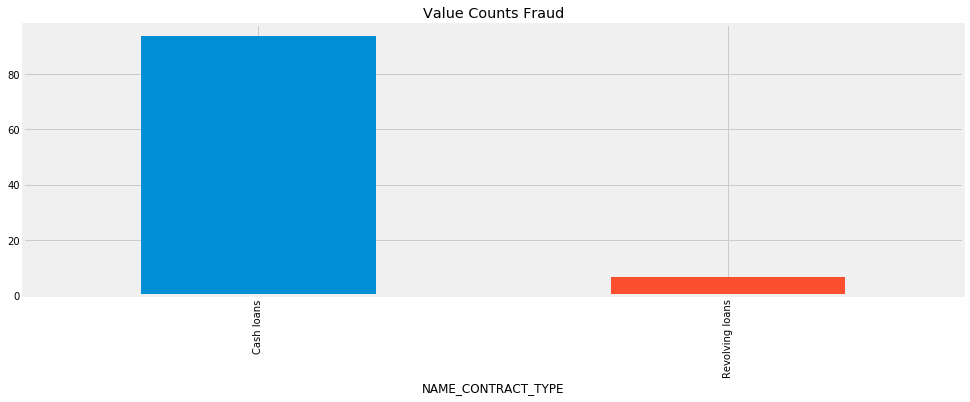

----------------------------------------------------------
----------------------------------------------------------
FEATURE: CODE_GENDER
NULLS: 0


SK_ID_CURR              TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET               0        1                                                               
CODE_GENDER                                                                                   
F             188278.0  14170.0  202448.0         7.526                  57.08          65.834
M              94404.0  10655.0  105059.0        11.287                  42.92          34.164
XNA                4.0      NaN       NaN           NaN                    NaN             NaN

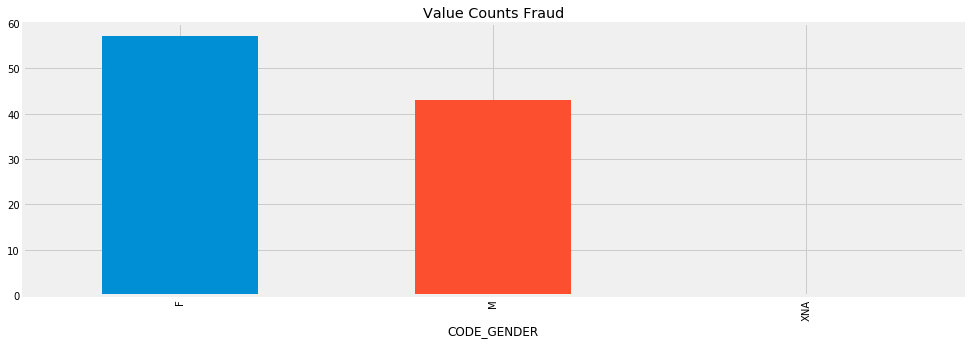

----------------------------------------------------------
----------------------------------------------------------
FEATURE: FLAG_OWN_CAR
NULLS: 0


SK_ID_CURR          TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                0      1                                                             
FLAG_OWN_CAR                                                                               
N                185675  17249  202924         9.290                 69.482          65.989
Y                 97011   7576  104587         7.809                 30.518          34.011

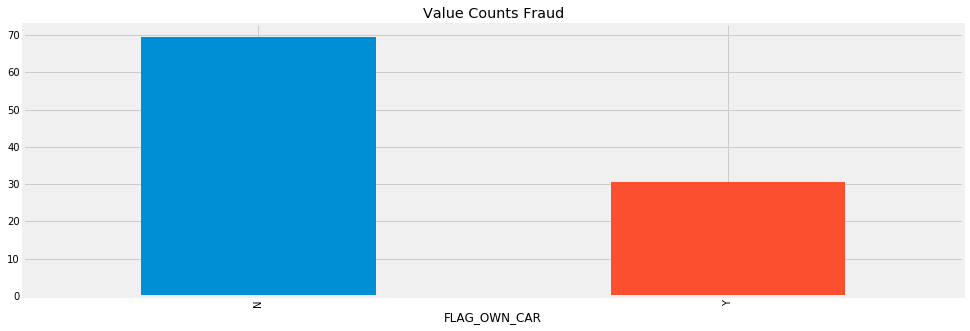

----------------------------------------------------------
----------------------------------------------------------
FEATURE: FLAG_OWN_REALTY
NULLS: 0


SK_ID_CURR          TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                   0      1                                                             
FLAG_OWN_REALTY                                                                               
N                    86357   7842   94199         9.081                 31.589          30.633
Y                   196329  16983  213312         8.650                 68.411          69.367

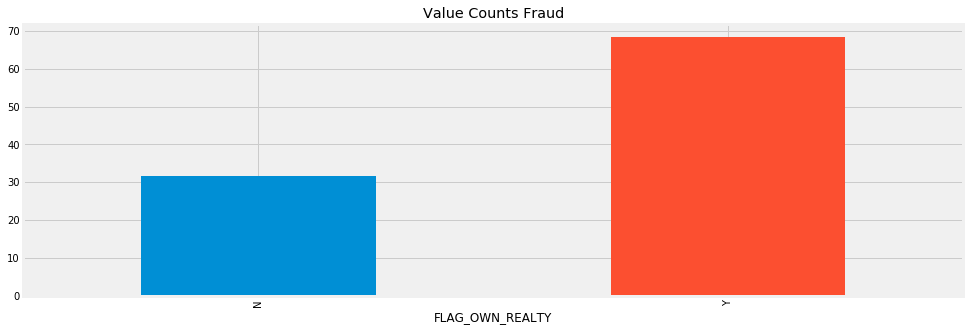

----------------------------------------------------------
----------------------------------------------------------
FEATURE: NAME_TYPE_SUITE
NULLS: 1292


SK_ID_CURR          TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                   0      1                                                             
NAME_TYPE_SUITE                                                                               
Children              3026    241    3267         7.964                  0.971           1.062
Family               37140   3009   40149         8.102                 12.121          13.056
Group of people        248     23     271         9.274                  0.093           0.088
Other_A                790     76     866         9.620                  0.306           0.282
Other_B               1596    174    1770        10.902                  0.701           0.576
Spouse, partner      10475    895   11370         8.544                  3.605           3.697
Unaccompanied       228189  20337  248526         8.912                 81.921          80.819

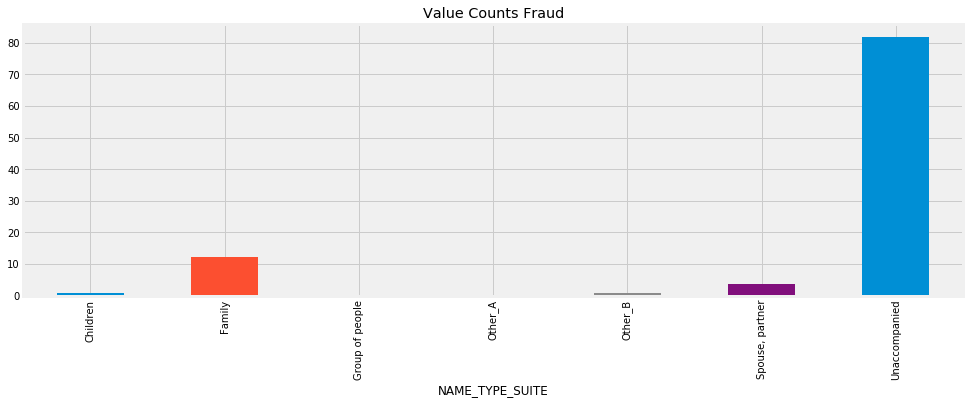

----------------------------------------------------------
----------------------------------------------------------
FEATURE: NAME_INCOME_TYPE
NULLS: 0


SK_ID_CURR              TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                        0        1                                                               
NAME_INCOME_TYPE                                                                                       
Businessman                10.0      NaN       NaN           NaN                    NaN             NaN
Commercial associate    66257.0   5360.0   71617.0         8.090                 21.591          23.289
Maternity leave             3.0      2.0       5.0        66.667                  0.008           0.002
Pensioner               52380.0   2982.0   55362.0         5.693                 12.012          18.003
State servant           20454.0   1249.0   21703.0         6.106                  5.031           7.058
Student                    18.0      NaN       NaN           NaN                    NaN             NaN
Unemployed                 14.0      8.0      22.0        57.143                  0.032           0.007
Working                143550.0  15224.0  158774.0        10.605                 61.325          51.632

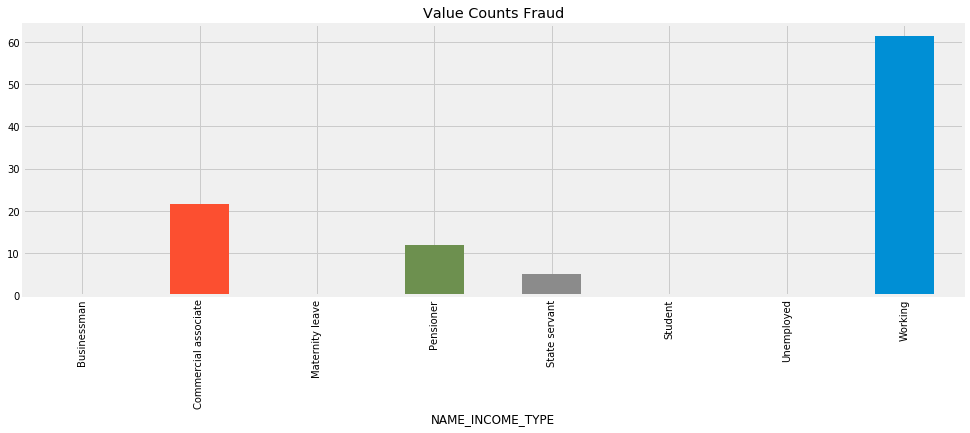

----------------------------------------------------------
----------------------------------------------------------
FEATURE: NAME_EDUCATION_TYPE
NULLS: 0


SK_ID_CURR          TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                                 0      1                                                             
NAME_EDUCATION_TYPE                                                                                         
Academic degree                      161      3     164         1.863                  0.012           0.053
Higher education                   70854   4009   74863         5.658                 16.149          24.345
Incomplete higher                   9405    872   10277         9.272                  3.513           3.342
Lower secondary                     3399    417    3816        12.268                  1.680           1.241
Secondary / secondary special     198867  19524  218391         9.818                 78.647          71.019

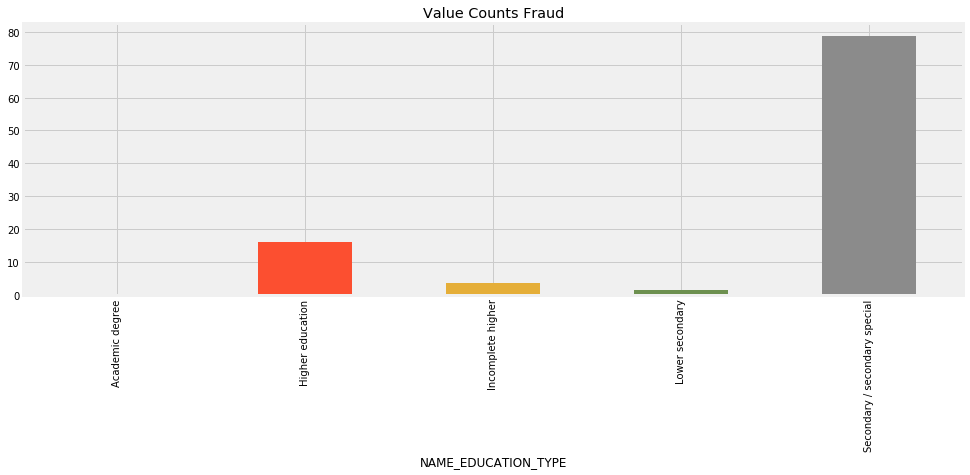

----------------------------------------------------------
----------------------------------------------------------
FEATURE: NAME_FAMILY_STATUS
NULLS: 0


SK_ID_CURR              TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                        0        1                                                               
NAME_FAMILY_STATUS                                                                                     
Civil marriage          26814.0   2961.0   29775.0        11.043                 11.927           9.683
Married                181582.0  14850.0  196432.0         8.178                 59.819          63.878
Separated               18150.0   1620.0   19770.0         8.926                  6.526           6.429
Single / not married    40987.0   4457.0   45444.0        10.874                 17.954          14.778
Unknown                     2.0      NaN       NaN           NaN                    NaN             NaN
Widow                   15151.0    937.0   16088.0         6.184                  3.774           5.232

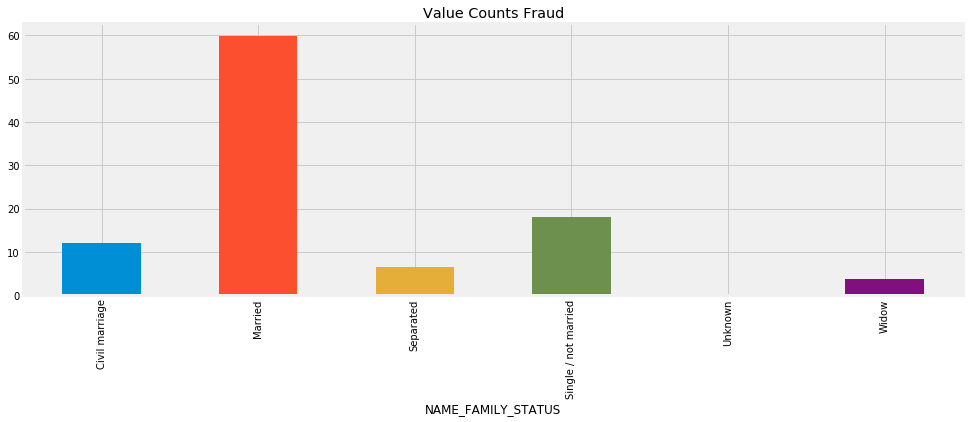

----------------------------------------------------------
----------------------------------------------------------
FEATURE: NAME_HOUSING_TYPE
NULLS: 0


SK_ID_CURR          TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                       0      1                                                             
NAME_HOUSING_TYPE                                                                                 
Co-op apartment           1033     89    1122         8.616                  0.359           0.365
House / apartment       251596  21272  272868         8.455                 85.688          88.734
Municipal apartment      10228    955   11183         9.337                  3.847           3.637
Office apartment          2445    172    2617         7.035                  0.693           0.851
Rented apartment          4280    601    4881        14.042                  2.421           1.587
With parents             13104   1736   14840        13.248                  6.993           4.826

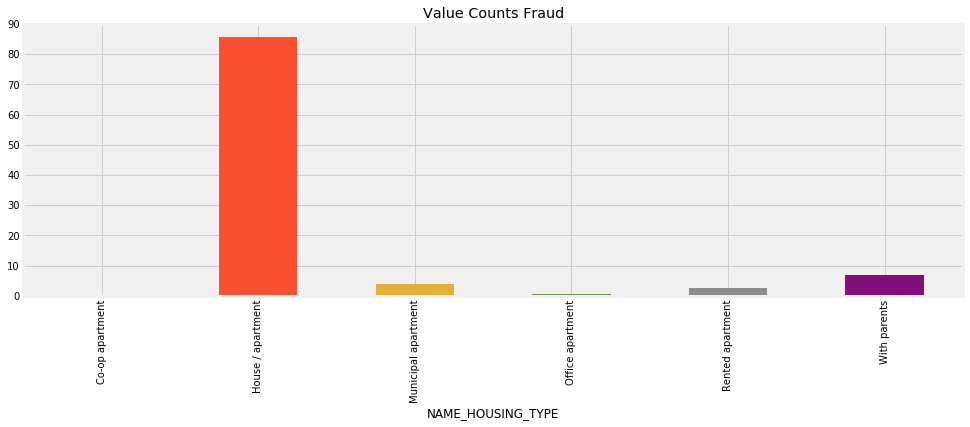

----------------------------------------------------------
----------------------------------------------------------
FEATURE: OCCUPATION_TYPE
NULLS: 96391


SK_ID_CURR        TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                         0     1                                                            
OCCUPATION_TYPE                                                                                   
Accountants                 9339   474   9813         5.075                  1.909           3.191
Cleaning staff              4206   447   4653        10.628                  1.801           1.513
Cooking staff               5325   621   5946        11.662                  2.502           1.934
Core staff                 25832  1738  27570         6.728                  7.001           8.966
Drivers                    16496  2107  18603        12.773                  8.487           6.050
HR staff                     527    36    563         6.831                  0.145           0.183
High skill tech staff      10679   701  11380         6.564                  2.824           3.701
IT staff                     492    34    526         6.911                  0.137           0.171
Laborers                   49348  5838  55186        11.830                 23.517          17.946
Low-skill Laborers          1734   359   2093        20.704                  1.446           0.681
Managers                   20043  1328  21371         6.626                  5.349           6.950
Medicine staff              7965   572   8537         7.181                  2.304           2.776
Private service staff       2477   175   2652         7.065                  0.705           0.862
Realty agents                692    59    751         8.526                  0.238           0.244
Sales staff                29010  3092  32102        10.658                 12.455          10.439
Secretaries                 1213    92   1305         7.585                  0.371           0.424
Security staff              5999   722   6721        12.035                  2.908           2.186
Waiters/barmen staff        1196   152   1348        12.709                  0.612           0.438

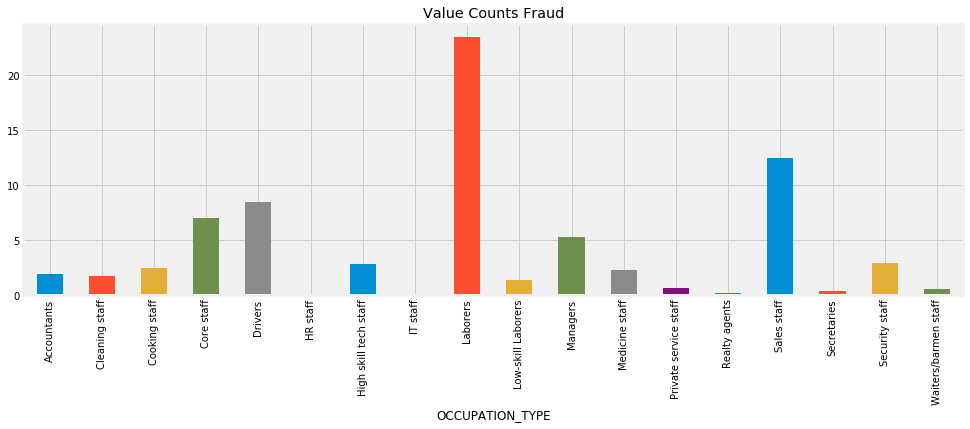

----------------------------------------------------------
----------------------------------------------------------
FEATURE: WEEKDAY_APPR_PROCESS_START
NULLS: 0


SK_ID_CURR        TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                              0     1                                                            
WEEKDAY_APPR_PROCESS_START                                                                             
FRIDAY                          46237  4101  50338         8.870                 16.520          16.369
MONDAY                          46780  3934  50714         8.410                 15.847          16.492
SATURDAY                        31182  2670  33852         8.563                 10.755          11.008
SUNDAY                          14898  1283  16181         8.612                  5.168           5.262
THURSDAY                        46493  4098  50591         8.814                 16.508          16.452
TUESDAY                         49400  4501  53901         9.111                 18.131          17.528
WEDNESDAY                       47696  4238  51934         8.885                 17.072          16.889

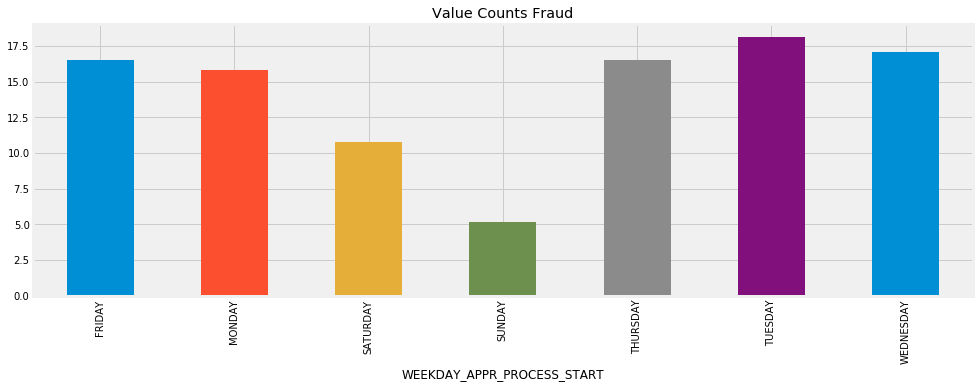

----------------------------------------------------------
----------------------------------------------------------
FEATURE: ORGANIZATION_TYPE
NULLS: 0


SK_ID_CURR        TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                          0     1                                                            
ORGANIZATION_TYPE                                                                                  
Advertising                   394    35    429         8.883                  0.141           0.140
Agriculture                  2197   257   2454        11.698                  1.035           0.798
Bank                         2377   130   2507         5.469                  0.524           0.815
Business Entity Type 1       5497   487   5984         8.859                  1.962           1.946
Business Entity Type 2       9653   900  10553         9.324                  3.625           3.432
Business Entity Type 3      61669  6323  67992        10.253                 25.470          22.110
Cleaning                      231    29    260        12.554                  0.117           0.085
Construction                 5936   785   6721        13.224                  3.162           2.186
Culture                       358    21    379         5.866                  0.085           0.123
Electricity                   887    63    950         7.103                  0.254           0.309
Emergency                     520    40    560         7.692                  0.161           0.182
Government                   9678   726  10404         7.502                  2.924           3.383
Hotel                         904    62    966         6.858                  0.250           0.314
Housing                      2723   235   2958         8.630                  0.947           0.962
Industry: type 1              924   115   1039        12.446                  0.463           0.338
Industry: type 10             102     7    109         6.863                  0.028           0.035
Industry: type 11            2470   234   2704         9.474                  0.943           0.879
Industry: type 12             355    14    369         3.944                  0.056           0.120
Industry: type 13              58     9     67        15.517                  0.036           0.022
Industry: type 2              425    33    458         7.765                  0.133           0.149
Industry: type 3             2930   348   3278        11.877                  1.402           1.066
Industry: type 4              788    89    877        11.294                  0.359           0.285
Industry: type 5              558    41    599         7.348                  0.165           0.195
Industry: type 6              104     8    112         7.692                  0.032           0.036
Industry: type 7             1202   105   1307         8.735                  0.423           0.425
Industry: type 8               21     3     24        14.286                  0.012           0.008
Industry: type 9             3143   225   3368         7.159                  0.906           1.095
Insurance                     563    34    597         6.039                  0.137           0.194
Kindergarten                 6396   484   6880         7.567                  1.950           2.237
Legal Services                281    24    305         8.541                  0.097           0.099
Medicine                    10456   737  11193         7.049                  2.969           3.640
Military                     2499   135   2634         5.402                  0.544           0.857
Mobile                        288    29    317        10.069                  0.117           0.103
Other                       15408  1275  16683         8.275                  5.136           5.425
Police                       2224   117   2341         5.261                  0.471           0.761
Postal                       1975   182   2157         9.215                  0.733           0.701
Realtor                       354    42    396        11.864                  0.169           0.129
Religion               

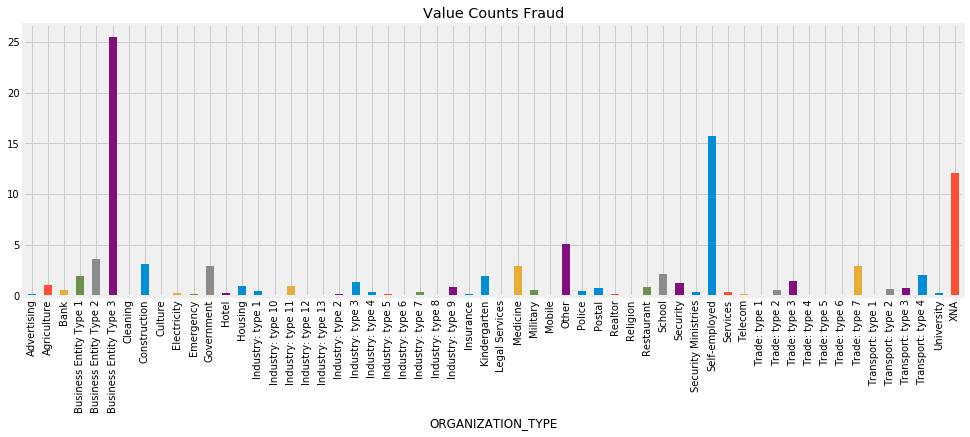

----------------------------------------------------------
----------------------------------------------------------
FEATURE: FONDKAPREMONT_MODE
NULLS: 210295


SK_ID_CURR        TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                         0     1                                                            
FONDKAPREMONT_MODE                                                                                
not specified               5258   429   5687         8.159                  1.728           1.849
org spec account            5292   327   5619         6.179                  1.317           1.827
reg oper account           68678  5152  73830         7.502                 20.753          24.009
reg oper spec account      11288   792  12080         7.016                  3.190           3.928

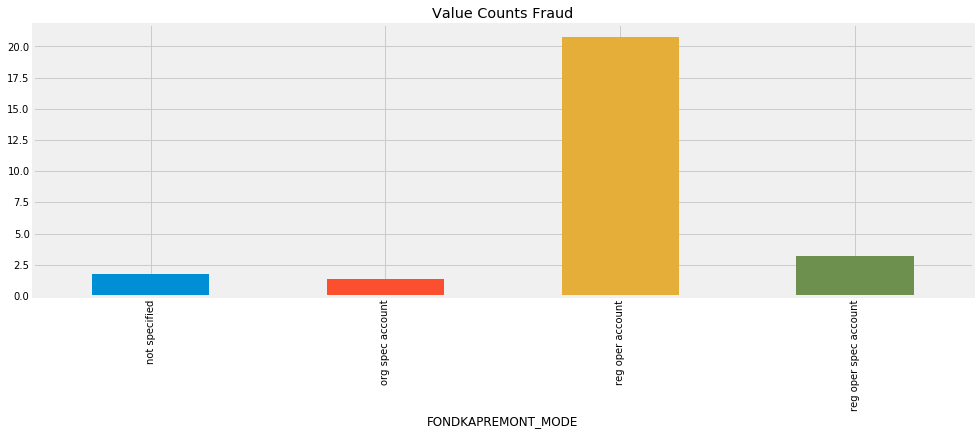

----------------------------------------------------------
----------------------------------------------------------
FEATURE: HOUSETYPE_MODE
NULLS: 154297


SK_ID_CURR          TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                    0      1                                                             
HOUSETYPE_MODE                                                                                 
block of flats       140053  10450  150503         7.461                 42.095          48.942
specific housing       1347    152    1499        11.284                  0.612           0.487
terraced house         1109    103    1212         9.288                  0.415           0.394

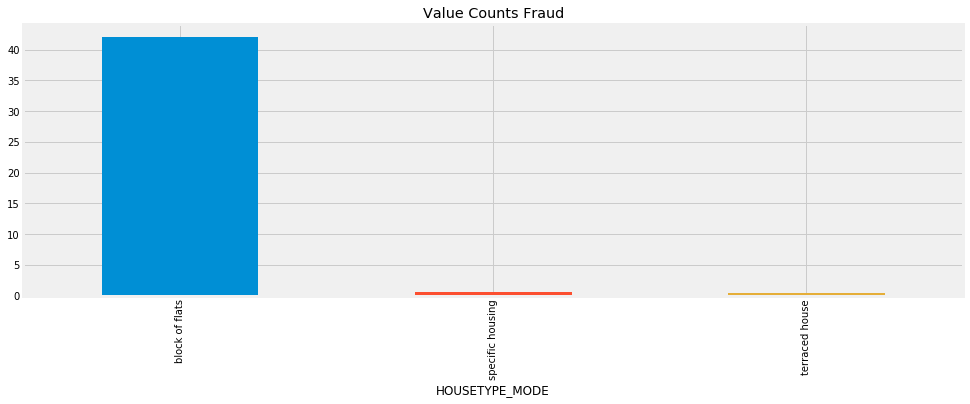

----------------------------------------------------------
----------------------------------------------------------
FEATURE: WALLSMATERIAL_MODE
NULLS: 156341


SK_ID_CURR        TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                      0     1                                                            
WALLSMATERIAL_MODE                                                                             
Block                    8603   650   9253         7.556                  2.618           3.009
Mixed                    2123   173   2296         8.149                  0.697           0.747
Monolithic               1695    84   1779         4.956                  0.338           0.579
Others                   1490   135   1625         9.060                  0.544           0.528
Panel                   61848  4192  66040         6.778                 16.886          21.476
Stone, brick            60015  4800  64815         7.998                 19.335          21.077
Wooden                   4842   520   5362        10.739                  2.095           1.744

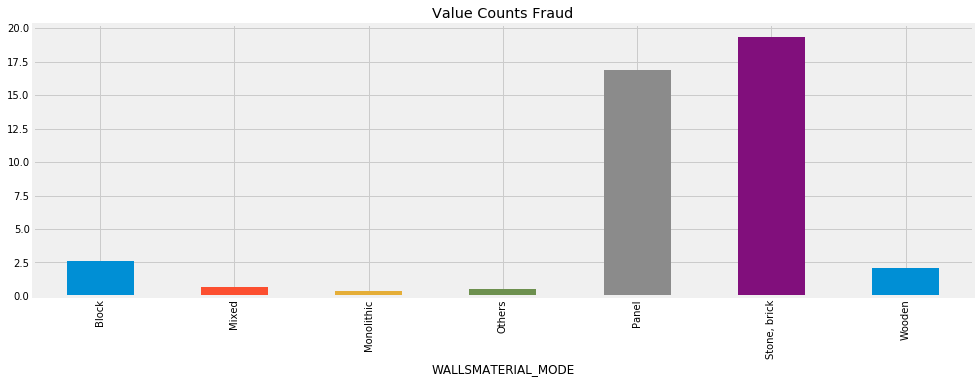

----------------------------------------------------------
----------------------------------------------------------
FEATURE: EMERGENCYSTATE_MODE
NULLS: 145755


SK_ID_CURR          TOTAL FRAUD_PERCENT PERCENT OF TOTAL FRAUD PERCENT OVERALL
TARGET                       0      1                                                             
EMERGENCYSTATE_MODE                                                                               
No                      148324  11104  159428         7.486                 44.729          51.845
Yes                       2105    223    2328        10.594                  0.898           0.757

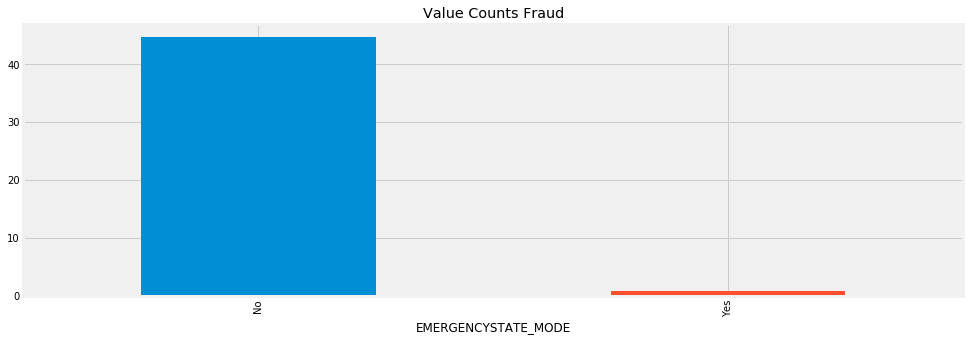

----------------------------------------------------------


In [10]:

for temp in list(train.select_dtypes(include = 'object').columns):
    print('----------------------------------------------------------')
    print('FEATURE:', temp)
    print('NULLS:', train[temp].isnull().sum())
    temp = train.pivot_table(index=[temp], values = ["SK_ID_CURR"],columns='TARGET', aggfunc='count')
    temp['TOTAL'] = temp.iloc[:,0] + temp.iloc[:,1]
    temp['FRAUD_PERCENT'] = round((temp.iloc[:,1]/temp.iloc[:,0])*100,3)
    temp['PERCENT OF TOTAL FRAUD'] = round((temp.iloc[:,1]/train_target_counts[1])*100,3)
    temp['PERCENT OVERALL'] = round((temp.TOTAL/ sum(train_target_counts))*100,3)
    display(temp)
    plt.show()
    temp.iloc[:,4].plot(kind = 'bar', figsize=(15,5), title= 'Value Counts Fraud');
    plt.show()
    print('----------------------------------------------------------')
    

In [11]:
numericals = ['CNT_CHILDREN']

In [12]:
train.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [36]:
train.pivot_table(index = 'ORGANIZATION_TYPE',columns='TARGET').head()

AMT_ANNUITY                   AMT_CREDIT                AMT_GOODS_PRICE                AMT_INCOME_TOTAL                AMT_REQ_CREDIT_BUREAU_DAY           AMT_REQ_CREDIT_BUREAU_HOUR           AMT_REQ_CREDIT_BUREAU_MON           AMT_REQ_CREDIT_BUREAU_QRT           AMT_REQ_CREDIT_BUREAU_WEEK           AMT_REQ_CREDIT_BUREAU_YEAR           APARTMENTS_AVG           APARTMENTS_MEDI           APARTMENTS_MODE           BASEMENTAREA_AVG           BASEMENTAREA_MEDI           BASEMENTAREA_MODE           CNT_CHILDREN           CNT_FAM_MEMBERS           COMMONAREA_AVG           COMMONAREA_MEDI           COMMONAREA_MODE              DAYS_BIRTH               DAYS_EMPLOYED              DAYS_ID_PUBLISH              DAYS_LAST_PHONE_CHANGE             DAYS_REGISTRATION              DEF_30_CNT_SOCIAL_CIRCLE           DEF_60_CNT_SOCIAL_CIRCLE           ELEVATORS_AVG           ELEVATORS_MEDI           ELEVATORS_MODE           ENTRANCES_AVG           ENTRANCES_MEDI            \
TARGET                             0             1              0              1               0              1                0              1                         0         1                          0         1                         0         1                         0         1                          0         1                          0         1              0         1               0         1               0         1                0         1                 0         1                 0         1            0         1               0         1              0         1               0         1               0         1             0             1             0            1               0            1                      0           1                 0            1                        0         1                        0         1             0         1              0         1              0         1             0         1              0         1   
ORGANIZATION_TYPE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
Advertising             29468.238579  27723.342857  618600.300761  647610.557143   561506.345178  584871.428571    204901.903553  192857.142857                  0.002933  0.000000                   0.008798  0.000000                  0.363636  0.500000                  0.319648  0.250000                   0.035191  0.000000                   1.853372  1.500000       0.145483  0.171150        0.145749  0.164370        0.137991  0.149260         0.099409  0.119805          0.098886  0.116480          0.094727  0.116555     0.360406  0.571429        2.045685  2.200000       0.054747  0.060385        0.054821  0.060777        0.050521  0.060938 -14511.340102 -13961.742857  -2164.177665 -1208.571429    -2826.769036 -2353.800000           -1008.378173 -704.457143      -4958.230964 -4703.885714                 0.131980  0.085714                 0.088832  0.057143      0.116132  0.147320       0.113898  0.139000       0.107158  0.130915      0.159796  0.188671       0.158875  0.183086   
Agriculture             25002.548930  25324.8

In [37]:
pd.DataFrame(df.groupby(["ORGANIZATION_TYPE", "TARGET"])["TARGET"].count()).T

ORGANIZATION_TYPE Advertising     Agriculture       Bank      Business Entity Type 1      Business Entity Type 2      Business Entity Type 3       Cleaning     Construction      Culture     Electricity     Emergency     Government      Hotel     Housing      Industry: type 1      Industry: type 10    Industry: type 11      Industry: type 12     Industry: type 13    Industry: type 2     Industry: type 3      Industry: type 4     Industry: type 5     Industry: type 6    Industry: type 7      Industry: type 8    Industry: type 9      Insurance     Kindergarten      Legal Services     Medicine      Military      Mobile      Other       Police      Postal      Realtor     Religion    Restaurant      School      Security      Security Ministries     Self-employed       Services      Telecom     Trade: type 1     Trade: type 2      Trade: type 3      Trade: type 4    Trade: type 5    Trade: type 6     Trade: type 7      Transport: type 1    Transport: type 2      Transport: type 3       \
TARGET                      0   1           0    1     0    1                      0    1                      0    1                      0     1        0   1            0    1       0   1           0   1         0   1          0    1     0   1       0    1                0    1                 0  1                 0    1                 0   1                 0  1                0   1                0    1                0   1                0   1                0  1                0    1                0  1                0    1         0   1            0    1              0   1        0    1        0    1      0   1      0     1      0    1      0    1       0   1        0  1          0    1      0    1        0    1                   0   1             0     1        0    1       0   1             0   1             0    1             0    1             0  1             0  1             0   1             0    1                 0  1                 0    1                 0    1   
TARGET                    394  35        2197  257  2377  130                   5497  487                   9653  900                  61669  6323      231  29         5936  785     358  21         887  63       520  40       9678  726   904  62    2723  235              924  115               102  7              2470  234               355  14                58  9              425  33             2930  348              788  89              558  41              104  8             1202  105               21  3             3143  225       563  34         6396  484            281  24    10456  737     2499  135    288  29  15408  1275   2224  117   1975  182     354  42       80  5       1599  212   8367  526     2923  324                1878  96         34504  3908     1471  104     533  44           317  31          1767  133          3131  361            62  2            46  3           602  29          7091  740               192  9              2032  172              1000  187   

ORGANIZATION_TYPE Transport: type 4      University        XNA        
TARGET                            0    1          0   1      0     1  
TARGET                         4897  501       1262  65  52384  2990

In [63]:
org_breakdown = train.pivot_table(index=["ORGANIZATION_TYPE"], values = ["SK_ID_CURR"],columns='TARGET', aggfunc='count')

# .plot(kind = 'bar', figsize=(35,10));

In [ ]:
 df.ix[:,0]

In [89]:
org_breakdown.head(10)

SK_ID_CURR          frd_pct
TARGET                          0     1           
ORGANIZATION_TYPE                                 
Advertising                   394    35   8.883249
Agriculture                  2197   257  11.697770
Bank                         2377   130   5.469079
Business Entity Type 1       5497   487   8.859378
Business Entity Type 2       9653   900   9.323526
Business Entity Type 3      61669  6323  10.253126
Cleaning                      231    29  12.554113
Construction                 5936   785  13.224394
Culture                       358    21   5.865922
Electricity                   887    63   7.102593

In [88]:
org_breakdown['frd_pct'] = (org_breakdown.iloc[:,1]/org_breakdown.iloc[:,0])*100

In [90]:
org_breakdown.iloc[:,2].plot(kind = 'bar', figsize=(35,10));

EMERGENCYSTATE_MODE
No      7.486
Yes    10.594
Name: (FRAUD_PERCENT, ), dtype: float64

In [114]:
org_breakdown.iloc[:,1].sort_values(ascending = False).head(15)

ORGANIZATION_TYPE
Business Entity Type 3    6323
Self-employed             3908
XNA                       2990
Other                     1275
Business Entity Type 2     900
Construction               785
Trade: type 7              740
Medicine                   737
Government                 726
School                     526
Transport: type 4          501
Business Entity Type 1     487
Kindergarten               484
Trade: type 3              361
Industry: type 3           348
Name: (SK_ID_CURR, 1), dtype: int64

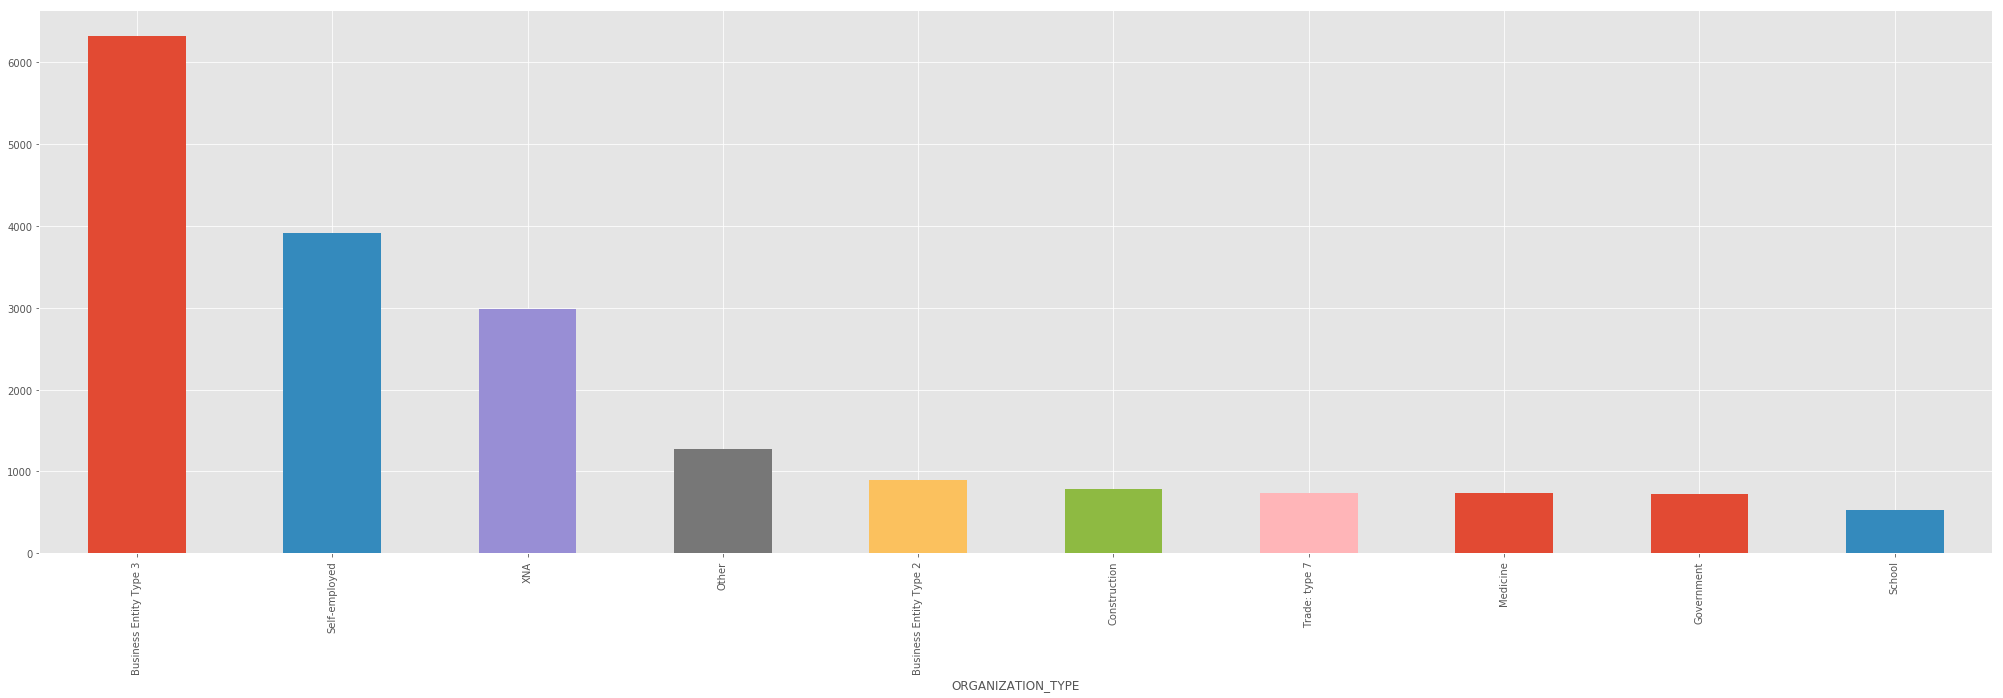

In [134]:
org_breakdown.iloc[:,1].sort_values(ascending = False).head(10).plot(kind = 'bar', figsize=(35,10));

In [131]:
org_breakdown.sort_values(by=["frd_pct"], ascending=False)

SK_ID_CURR          frd_pct
TARGET                          0     1           
ORGANIZATION_TYPE                                 
Transport: type 3            1000   187  18.700000
Industry: type 13              58     9  15.517241
Industry: type 8               21     3  14.285714
Restaurant                   1599   212  13.258286
Construction                 5936   785  13.224394
Cleaning                      231    29  12.554113
Industry: type 1              924   115  12.445887
Industry: type 3             2930   348  11.877133
Realtor                       354    42  11.864407
Agriculture                  2197   257  11.697770
Trade: type 3                3131   361  11.529863
Self-employed               34504  3908  11.326223
Industry: type 4              788    89  11.294416
Security                     2923   324  11.084502
Trade: type 7                7091   740  10.435764
Business Entity Type 3      61669  6323  10.253126
Transport: type 4            4897   501  10.230754
Mobile                        288    29  10.069444
Trade: type 1                 317    31   9.779180
Industry: type 11            2470   234   9.473684
Business Entity Type 2       9653   900   9.323526
Postal                       1975   182   9.215190
Advertising                   394    35   8.883249
Business Entity Type 1       5497   487   8.859378
Industry: type 7             1202   105   8.735441
Housing                      2723   235   8.630187
Legal Services                281    24   8.540925
Transport: type 2            2032   172   8.464567
Other                       15408  1275   8.274922
Telecom                       533    44   8.255159
Industry: type 2              425    33   7.764706
Industry: type 6              104     8   7.692308
Emergency                     520    40   7.692308
Kindergarten                 6396   484   7.567230
Trade: type 2                1767   133   7.526882
Government                   9678   726   7.501550
Industry: type 5              558    41   7.347670
Industry: type 9             3143   225   7.158766
Electricity                   887    63   7.102593
Services                     1471   104   7.070020
Medicine                    10456   737   7.048585
Industry: type 10             102     7   6.862745
Hotel                         904    62   6.858407
Trade: type 5                  46     3   6.521739
School                       8367   526   6.286602
Religion                       80     5   6.250000
Insurance                     563    34   6.039076
Culture                       358    21   5.865922
XNA                         52384  2990   5.707850
Bank                         2377   130   5.469079
Military                     2499   135   5.402161
Police                       2224   117   5.260791
University                   1262    65   5.150555
Security Ministries          1878    96   5.111821
Trade: type 6                 602    29   4.817276
Transport: type 1             192     9   4.687500
Industry: type 12             355    14   3.943662
Trade: type 4                  62     2   3.225806

In [121]:
train.loc[df['ORGANIZATION_TYPE'].isin([
'Business Entity Type 3',
 'Self-employed',
 'XNA',
 'Other',
 'Business Entity Type 2',
 'Construction',
 'Trade: type 7',
 'Medicine',
 'Government',
 'School',
 'Transport: type 4',
 'Business Entity Type 1',
 'Kindergarten',
 'Trade: type 3',
 'Industry: type 3',])].TARGET.value_counts()

0    237997
1     21091
Name: TARGET, dtype: int64

In [122]:
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [77]:
pd.pivot_table(df, index=["ORGANIZATION_TYPE"],aggfunc= "count", columns="TARGET")

AMT_ANNUITY       AMT_CREDIT       AMT_GOODS_PRICE       AMT_INCOME_TOTAL       AMT_REQ_CREDIT_BUREAU_DAY       AMT_REQ_CREDIT_BUREAU_HOUR       AMT_REQ_CREDIT_BUREAU_MON       AMT_REQ_CREDIT_BUREAU_QRT       AMT_REQ_CREDIT_BUREAU_WEEK       AMT_REQ_CREDIT_BUREAU_YEAR       APARTMENTS_AVG       APARTMENTS_MEDI       APARTMENTS_MODE       BASEMENTAREA_AVG       BASEMENTAREA_MEDI       BASEMENTAREA_MODE       CNT_CHILDREN       CNT_FAM_MEMBERS       CODE_GENDER       COMMONAREA_AVG       COMMONAREA_MEDI       COMMONAREA_MODE       DAYS_BIRTH       DAYS_EMPLOYED       DAYS_ID_PUBLISH       DAYS_LAST_PHONE_CHANGE       DAYS_REGISTRATION       DEF_30_CNT_SOCIAL_CIRCLE       DEF_60_CNT_SOCIAL_CIRCLE       ELEVATORS_AVG       ELEVATORS_MEDI       ELEVATORS_MODE       EMERGENCYSTATE_MODE       ENTRANCES_AVG       ENTRANCES_MEDI       ENTRANCES_MODE       EXT_SOURCE_1       EXT_SOURCE_2       EXT_SOURCE_3       FLAG_CONT_MOBILE       FLAG_DOCUMENT_10        \
TARGET                           0     1          0     1               0     1                0     1                         0     1                          0     1                         0     1                         0     1                          0     1                          0     1              0     1               0     1               0     1                0     1                 0     1                 0     1            0     1               0     1           0     1              0     1               0     1               0     1          0     1             0     1               0     1                      0     1                 0     1                        0     1                        0     1             0     1              0     1              0     1                   0     1             0     1              0     1              0     1            0     1            0     1            0     1                0     1                0     1   
ORGANIZATION_TYPE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
Advertising                    394    35        394    35             394    35              394    35                       341    32                        341    32                       341    32                       341    32                        341    32                        341    32            246    20             246    20             246    20              211    20               211    20               211    20          394    35             394    35         394    35            160    13             160    13             160    13        394    35           394    35             394    35                    394    35               394    35                      394    35                      394    35           236    20            236    20            236    20                 262    21           251    21            251    21            251    21          233    18          393    35          318    31              394    35              394    35   
Agriculture                   2197   257       2197   257            21

In [ ]:
train

In [69]:
pd.pivot_table(df, index=["OCCUPATION_TYPE","TARGET"], aggfunc='count')

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  APARTMENTS_AVG  APARTMENTS_MEDI  APARTMENTS_MODE  BASEMENTAREA_AVG  BASEMENTAREA_MEDI  BASEMENTAREA_MODE  CNT_CHILDREN  CNT_FAM_MEMBERS  CODE_GENDER  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  ELEVATORS_AVG  ELEVATORS_MEDI  ELEVATORS_MODE  EMERGENCYSTATE_MODE  ENTRANCES_AVG  ENTRANCES_MEDI  ENTRANCES_MODE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_CONT_MOBILE  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_2  FLAG_DOCUMENT_20  \
OCCUPATION_TYPE       TARGET                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
Accountants           0              9338        9339             9328              9339                       8354                        8354                       8354                       8354                        8354                        8354            5258             5258             5258              4486               4486               4486          9339             9338         9339            3299             3299             3299        9339           9339             9339                    9339               9339                      9293                      9293           5058            5058            5058                 5594           5326            5326            5326          6002          9316          7828              9339              9339              9339              9339              9339              9339              9339              9339              9339              9339              9339             9339              9339   
                      1               474         474              474               474                        412                         412                        412                        412                         412                         412             234              234              234               192                192                192           474              474          474             133              133              133         474            474              474                     474                474                       474                       474            226             226             226                  251            239             239             239           289           472           395               474               474               474               474               474               474               474               474               474               474               474              474               474   
Cleaning staff        0              4206        4206             4201              42

In [71]:
df.pivot_table(index='OCCUPATION_TYPE', aggfunc="count")

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE,HOUR_APPR_PROCESS_START,HOUSETYPE_MODE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,ORGANIZATION_TYPE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
OCCUPATION_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Accountants,9812,9813,9802,9813,8766,8766,8766,8766,8766,8766,5492,5492,5492,4678,4678,4678,9813,9812,9813,3432,3432,3432,9813,9813,9813,9813,9813,9767,9767,5284,5284,5284,5845,5565,5565,5565,6291,9788,8223,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,9813,5603,5603,5603,3669,3669,3669,3604,9813,5548,4550,4550,4550,9813,9813,3608,3608,3608,5555,5555,5555,9813,9813,9813,9813,9813,9769,3490,3490,3490,5087,5087,5087,9767,9767,9813,3438,9813,9813,9813,9813,9813,9813,9813,9813,9813,5753,5478,9813,5692,5692,5692,3814,3814,3814
Cleaning staff,4653,4653,4648,4653,3962,3962,3962,3962,3962,3962,2403,2403,2403,1993,1993,1993,4653,4653,4653,1439,1439,1439,4653,4653,4653,4653,4653,4636,4636,2230,2230,2230,2571,2418,2418,2418,1472,4644,3660,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,2452,2452,2452,1512,1512,1512,1500,4653,2444,1985,1985,1985,4653,4653,1490,1490,1490,2442,2442,2442,4653,4653,4653,4653,4653,4641,1445,1445,1445,2154,2154,2154,4636,4636,4653,632,4653,4653,4653,4653,4653,4653,4653,4653,4653,2534,2400,4653,2498,2498,2498,1575,1575,1575
Cooking staff,5945,5946,5940,5946,5098,5098,5098,5098,5098,5098,2533,2533,2533,2063,2063,2063,5946,5946,5946,1481,1481,1481,5946,5946,5946,5946,5946,5929,5929,2347,2347,2347,2741,2548,2548,2548,2462,5932,4668,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,5946,2592,2592,2592,1601,1601,1601,1556,5946,2578,2080,2080,2080,5946,5946,1557,1557,1557,2571,25

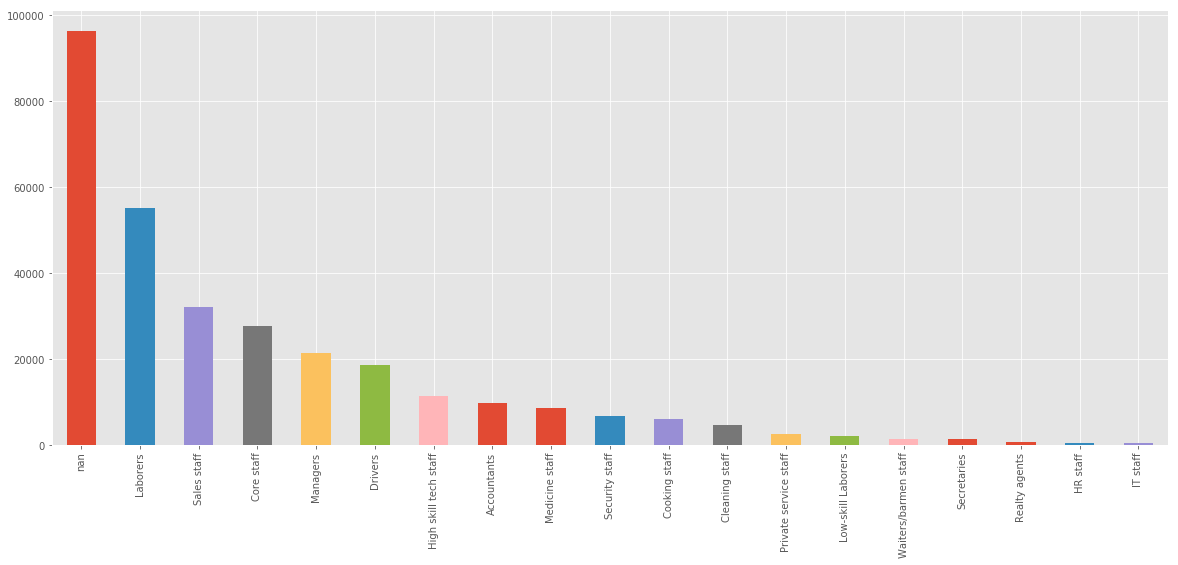

In [89]:
df.OCCUPATION_TYPE.value_counts(dropna=False).plot(kind= 'bar', figsize = (20,8));

In [39]:
df.groupby("NAME_CONTRACT_TYPE").TARGET.agg(["count"])

,count
NAME_CONTRACT_TYPE,
Cash loans,278232
Revolving loans,29279
